## In this notebook we will try to create a simple linear regression example without using any ML libraries at the beginning. Later on we will compare our results using a standard LinearRegression model from Sklearn

In [3]:
# Import Python libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [62]:
# Creating dummy data
# Let us assume x = Sq. Feet area and y = Price(in Lakhs)
x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1400, 1700, 2000]
y = [1.1, 2.3, 4.5, 4.8, 6.1, 7.2, 8.7, 9.9, 11.2, 10.8, 11.7, 13.5, 18.2, 20.5]

In [27]:
df = pd.DataFrame(data=list(zip(x, y)), columns=['sq.ft', 'cost'])

In [28]:
df

,sq.ft,cost
0,100,1.1
1,200,2.3
2,300,4.5
3,400,4.8
4,500,6.1
5,600,7.2
6,700,8.7
7,800,9.9
8,900,11.2
9,1000,10.8


In [37]:
# Finding the slope
x_mean = np.mean(df['sq.ft'])
print(x_mean)
y_mean = np.mean(df['cost'])
print(y_mean)

835.7142857142857
9.321428571428571


In [39]:
n = len(x)
print(n)

14


In [41]:
numerator = 0
denominator = 0
for i in range(n):
    numerator += (x[i] - x_mean)*(y[i] - y_mean)
    denominator += (x[i] - x_mean)**2


# Slope
m = numerator/denominator
print(m)

0.009861538461538463


In [42]:
# Finding the bias term or constant, c = y -mx
c = y_mean - m*x_mean
print(c)

1.0799999999999983


In [46]:
# Predictions
x_pred = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1400, 1700, 2000]
y_pred = []
for x in x_pred:
    y_pred.append(m*x + c)

print(y_pred)

[2.0661538461538447, 3.052307692307691, 4.038461538461537, 5.024615384615384, 6.01076923076923, 6.996923076923077, 7.983076923076923, 8.96923076923077, 9.955384615384615, 10.941538461538462, 11.927692307692308, 14.886153846153848, 17.844615384615384, 20.803076923076926]


In [47]:
# Calculating R-square
num_r = 0
den_r = 0
for i in range(n):
    num_r += (y_pred[i] - y_mean)**2
    den_r += (y[i] - y_mean)**2
    
r = num_r/den_r

In [48]:
print(r)

0.9829920197305864


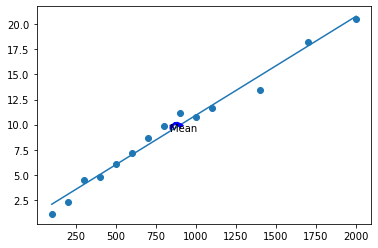

In [56]:
plt.scatter(df['sq.ft'], df['cost'])
plt.plot(df['sq.ft'], y_pred)
plt.annotate(text = "Mean",xy =(x_mean, y_mean), color='black', arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=0.95', 
                            color='b'))
plt.show()

In [57]:
# Our R-square score is pretty good and we can see that the Regression line has also fit well with the data

In [60]:
# Import LinearRegression Model from SKLearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [82]:
# Preparing data for feeding it to the LinearRegression model
X = np.asarray(df['sq.ft']).reshape(n, 1)
Y = np.asarray(df['cost']).reshape(n, 1)

In [83]:
X

array([[ 100],
       [ 200],
       [ 300],
       [ 400],
       [ 500],
       [ 600],
       [ 700],
       [ 800],
       [ 900],
       [1000],
       [1100],
       [1400],
       [1700],
       [2000]], dtype=int64)

In [70]:
# Creating the LinearRegression object
reg = LinearRegression()

In [84]:
reg = reg.fit(X, Y)

LinearRegression()

In [85]:
Y_pred = reg.predict(X)

In [86]:
Y_pred

array([[ 2.06615385],
       [ 3.05230769],
       [ 4.03846154],
       [ 5.02461538],
       [ 6.01076923],
       [ 6.99692308],
       [ 7.98307692],
       [ 8.96923077],
       [ 9.95538462],
       [10.94153846],
       [11.92769231],
       [14.88615385],
       [17.84461538],
       [20.80307692]])

In [90]:
# Calculating the MSE and R-square scores
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

In [92]:
print(rmse)
print(r2_score)

0.7047250262601454
0.9829920197305861


We can clearly see that the R-squared scores are the same for both the model!!